# Algorithmes de Première Générale

Ce document contient la liste exhaustive des exemples d’algorithmes figurant dans le programme d’enseignement de spécialité de mathématiques de première générale.
L’écriture de ces algorithmes se veut simple, sans utilisation exagérée de fonctions “toutes faites” inclues dans les bibliothèques de Python et en utilisant à chaque fois une écriture fonctionnelle des algorithmes afin de pouvoir être réutilisés à l’avenir.
Certaines fonctions Python sont complétées par des versions “professeur” afin d’enrichir les illustrations proposées aux élèves. En particulier, merci à M.S.Modeliar (Université d’Artois) pour la création de figures dynamiques à l’aide de matplotlib.

**Sommaire** <a id="sommaire"></a>
1. [Calcul des termes d'une suite définie de manière explicite](#exemple1)
2. [Calcul des termes d'une suite définie par récurrence](#exemple2)
3. [Calcul de la somme des termes d'une suite](#exemple3)
4. [Calcul de seuil](#exemple4)
5. [Calcul de la factorielle](#exemple5)
6. [Suite de Syracuse](#exemple6)
7. [Suite de Fibonacci](#exemple7)
8. [Écrire la liste des coefficients directeurs des sécantes pour un pas donné](#exemple8)
9. [Méthode de Newton en se limitant à des cas favorables](#exemple9)
10. [Construction de l'exponentielle par la méthode d'Euler](#exemple10)
11. [Détermination d'une valeur approchée de $e$](#exemple11)
12. [Détermination de $\pi$ par la méthode d'Archimède](#exemple12)
13. [Estimation de l'aire sous la parabolle](#exemple13)
14. [Estimation du nombre $\pi$ par la méthode de Monte-Carlo](#exemple14)
15. [Algorithme renvoyant l'espérance, la variance et l'écart-type d'une variable aléatoire](#exemple15)
16. [Fréquence d'apparition des lettres d'un texte donné, en français et en anglais](#exemple16)

# 1. Partie "Algèbre"

## 1.1 Calcul des termes d'une suite, de sommes de termes, de seuil.

### 1.1.1 Suite définie de manière explicite <a id="exemple1"></a>

On peut générer la liste des termes d'une suite définie par ajouts successifs, ou directement "en compréhension". 

In [ ]:
# formule explicite
def u(n):
    return 4*n + 5

# ajouts successifs
def SuiteExplicite(u, debut, fin):
    suite = []
    for k in range(debut, fin+1):
        suite.append(u(k))
    return suite

In [ ]:
SuiteExplicite(u,0,10)

In [ ]:
# en compréhension
SuiteComprehension = [u(n) for n in range(11)]

In [ ]:
SuiteComprehension

[Retour au sommaire](#sommaire)

### 1.1.2 Suite définie par récurrence <a id="exemple2"></a>

On génère la liste des termes d’une suite définie par récurrence par ajouts successifs. L’utilisation de fonction définie de manière récursive n’est pas au programme.

In [ ]:
def f(x):
    return x+4

def SuiteRecurrente(f,u_0,fin):
    suite = [u_0]
    for compteur in range(1,fin+1):
        suite.append(f(suite[-1]))
    return suite

In [ ]:
SuiteRecurrente(f,5,10)

[Retour au sommaire](#sommaire)

### 1.1.3 Calculs de sommes de termes <a id="exemple3"></a>

On peut calculer la somme des termes d'une suite en même temps que le calcul effectif des termes de la suite, on peut utiliser une fonction qui, une fois la liste des termes obtenue, opère sur les éléments de cette liste ou utiliser la fonction sum qui prend comme argument la liste dont on veut calculer la somme des éléments.

In [ ]:
# Calcul de la somme en même temps que le calcul des termes de la suite

def u(n):
    return 4*n+5

def SommeDesTermes (u,debut, fin):
    somme = 0
    for k in range(debut,fin+1): 
        somme = somme + u(k) 
    return somme

In [ ]:
SommeDesTermes(u,0,10)

In [ ]:
# Calcul de la somme en parcourant la liste des termes

def SommeDesTermes2(liste):
    somme = 0
    for k in liste:
        somme += k
    return somme

In [ ]:
SommeDesTermes2(SuiteRecurrente(f,0,10))

In [ ]:
# Utilisation de la fonction 'sum'

sum(SuiteRecurrente(f,0,10))

[Retour au sommaire](#sommaire)

### 1.1.4 Calcul de seuil <a id="exemple4"></a>

On répond au problème « déterminer la plus petite valeur de $n$ telle que $u_n \geqslant \mathrm{seuil}$ ». 

In [ ]:
def u(n):
    return 4*n+5

def Seuil(u, seuil):
    n = 0
    while u(n) <  seuil:
        n += 1
    return n

In [ ]:
Seuil(u,10000)

**On peut proposer une illustration graphique de la notion de seuil.**

In [ ]:
import matplotlib.pyplot as plt

def SeuilGraphique(u,seuil):
    n=0
    Liste_X=[]
    Liste_Y=[]
    while u(n)<seuil:
        Liste_X.append(n)
        Liste_Y.append(u(n))
        n = n+1
    plt.plot(Liste_X,Liste_Y,"b.")
    plt.plot(n,u(n),"r.")
    plt.plot([0,n],[seuil,seuil],"g--")
    plt.show()
    return None

In [ ]:
SeuilGraphique(u, 100)

**On peut également proposer une illustration dynamique de la situation.**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from random import *
from IPython.display import HTML

###########
seuil = 100 
###########

def u(n):
    return 4*n+5

def Seuil(u,seuil): 
    n=0
    while u(n)<seuil:
        n = n+1
    return n+1

def Seuil2(u,seuil):
    n=0
    ListeY=[]
    while u(n) < seuil:
        ListeY.append(u(n))
        n += 1
    ListeY.append(u(n))
    return ListeY

fig, axe = plt.subplots()
axe.plot([0,Seuil(u,seuil)],[seuil,seuil],"g--")
xdata, ydata = [], []
points, = plt.plot([], [], "b.")

ListeARepresenter = Seuil2(u, seuil)

def init():
    axe.set_xlim(0,Seuil(u,seuil))
    axe.set_ylim(0, seuil + 10)
    return points,

def update(i):
    xdata.append(i)
    ydata.append(ListeARepresenter[i])
    points.set_data(xdata,ydata)
    return points,

animation = FuncAnimation(fig, update, frames=Seuil(u, seuil), init_func=init, blit=True)
HTML(animation.to_jshtml())
#HTML.animation.to_html5_video())

[Retour au sommaire](#sommaire)

## 1.2 Calcul de factorielle <a id="exemple5"></a>

Le calcul peut s'envisager de manière itérative avec des boucles bornées (*pour*) et non bornées (*while*).

In [ ]:
def factorielle(n):
    fact = 1
    i = 1
    while i <= n:
        fact *= i
        i += 1
    return fact

In [ ]:
factorielle(10)

In [ ]:
def factorielle2(n):
    fact = 1
    for k in range(2,n+1):
        fact *= k
    return fact

In [ ]:
factorielle2(10)

Pour information, et même si la récursivité n'est pas au programme, elle reste le moyen le plus direct pour calculer une factorielle. 

In [ ]:
def factorielle3(n):
    if n == 0 : 
        return 1
    else:
        return n*factorielle3(n-1)

In [ ]:
factorielle3(10)

[Retour au sommaire](#sommaire)

## 1.3 Liste des premiers termes d'une suite : suite de Syracuse, suite de Fibonacci. 

### 1.3.1 Suite de Syracuse <a id="exemple6"></a>

La suite de Syracuse une suite d'entiers naturels définie de la manière suivante: on part d'un nombre entier plus grand que zéro ; s'il est pair, on le divise par 2 ; s'il est impair, on le multiplie par 3 et on ajoute 1.
Après que le nombre 1 a été atteint, la suite des valeurs (1,4,2,1,4,2...) se répète indéfiniment en un cycle de longueur 3, appelé cycle trivial.
La conjecture de Syracuse est: *« la suite de Syracuse de n'importe quel entier strictement positif atteint 1 »*.

En dépit de la simplicité de son énoncé, cette conjecture défie depuis de nombreuses années les mathématiciens. Paul Erdós a dit à propos de la conjecture de Syracuse : « les mathématiques ne sont pas encore prêtes pour de tels problèmes ».

In [ ]:
def Syracuse (u0):
    suite=[u0] 
    u = u0 
    while (u>1): 
        if u % 2 != 0: 
            u = 3*u+1 
        else: 
            u = u//2 
        suite.append(u) 
    return suite

In [ ]:
Syracuse(24)

In [ ]:
import matplotlib.pyplot as plt

def RepresentationGraphiqueSuite(suite):
    plt.plot(range(0,len(suite)),suite,"b+")
    plt.show()

In [ ]:
RepresentationGraphiqueSuite(Syracuse(2019))

**Remarque** : on peut déterminer certains paramètres de la [suite de Syracuse](https://fr.wikipedia.org/wiki/Conjecture_de_Syracuse). C'est l'occasion de travailler sur les listes. 

- **Le temps de vol** est le plus petit indice $n$ tel que $u_n = 1$. 
- **Le temps de vol en altitude** est le plus petit indice $n$ tel que $u_n < u_0$.
- **L'altitude maximale** est la valeur maximale de la suite. 

In [ ]:
def ParametresSyracuse(suite):
    temps_de_vol = len(suite) - 1
    altitude_max = max(suite)
    n = 0
    while suite[n] >= suite[0]:
        n += 1
    temps_de_vol_altitude = n-1
    return (temps_de_vol, altitude_max, temps_de_vol_altitude)

In [ ]:
ParametresSyracuse(Syracuse(2019))

**Remarque** : on peut rassembler toutes ces propriétés dans une seule classe. 

In [ ]:
class Syracuse:
    def __init__(self,u0) -> None:
        self.suite=[u0]
        u = u0
        while (u>1): 
            if u % 2 != 0: 
                u = 3*u+1 
            else: 
                u = u//2 
            self.suite.append(u)
        self.TempsDeVol = len(self.suite) - 1
        self.AltitudeMax = max(self.suite)
        n = 0
        while self.suite[n] >= self.suite[0]:
            n += 1
        self.TempsDeVolAltitude = n-1

    def RepresentationGraphiqueSuite(self):
        plt.plot(range(0,self.TempsDeVol + 1),self.suite,"r+")
        plt.show()


In [ ]:
vol = Syracuse(2019)
print(vol.AltitudeMax, vol.TempsDeVol,vol.TempsDeVolAltitude)
vol.RepresentationGraphiqueSuite()

[Retour au sommaire](#sommaire)

### 1.3.2 Suite de Fibonacci <a id="exemple7"></a>

La suite de Fibonacci est définie par $u_0 = 0$, $u_1 = 1$ et pour tout entier $n \geqslant 0$, $u_{n+2} = u_{n+1} + u_{n}$. 

In [ ]:
def fibonacci(n):
    if n == 0:
        fibo = [0]
    else:
        fibo = [0, 1]
        for k in range(1,n):
            fibo.append(fibo[-2] + fibo[-1])
    return fibo


In [ ]:
fibonacci(3)

**Remarque** : on peut étudier le comportement de la suite de terme général le quotient de deux termes consécutifs de la suite. 

In [ ]:
import matplotlib.pyplot as plt

n = 20

X = [k for k in range(2,n+1)]
Y = [fibonacci(n)[k]/fibonacci(n)[k-1] for k in range(2,n+1)]
plt.plot(X, Y, "b+")
plt.show()

[Retour au sommaire](#sommaire)

# Partie "analyse"

## 2.1 Écrire la liste des coefficients directeurs des sécantes pour un pas donné <a id="exemple8"></a>

On considère une fonction $f$ définie sur un intervalle $[a;b]$ et un pas $h$. On découpe l'intervalle $[a;b]$ en $\frac{b-a}{h}$ parties égales.

In [ ]:
def f(x):
    return x**2

def CoeffDirecteursSecantes(f,a,b,h):
    liste = []
    n = int((b-a)/h)
    for i in range(n):
        liste.append((f(a+(n-i)*h)-f(a))/((n-i)*h))
    return liste

In [ ]:
CoeffDirecteursSecantes(f,1,2,0.01)

[Retour au sommaire](#sommaire)

## 2.2 Méthode de Newton (en se limitant à des cas favorables) <a id="exemple9"></a>

$f$ est une fonction dérivable sur un intervalle $I$ telle que l'équation $f(x) = 0$ admet une unique solution $\alpha \in I$.

Pour approximer $\alpha$, en un point $A$ d'abscisse $x_0 \in I$ proche de $\alpha$, on approxime localement la courbe de $f$ par la tangente au point $A$ : $f(\alpha) \approx f(x_0) + (\alpha-x_0)f'(x_0)$ et donc si $f'(x_0) \neq 0$, $\alpha \approx x_0 - \frac{f(x_0)}{f'(x_0)} = x_1$. 

On construit donc la suite $(x_n)$ définie par la donnée de $x_0$ et, pour tout entier naturel $n$, $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$.

On propose donc des situations "dans les cas favorables", c'est-à-dire en évitant les cas particuliers où la dérivée pourrait s'annuler.

On fait le choix de créer deux fonctions, $f$ et $f'$. Il est possible également de travailler seulement avec $f$ et d'évaluer le nombre dérivé. On s'arrête quand la distance entre deux termes successifs de la suite $(x_n)$ est inférieure à une précision donnée.

In [ ]:
def f(x):
    return x**2 - 2

def fprime(x):
    return 2*x

def Newton(x0, precision):
    X = [x0]
    x = x0
    while abs(f(x)/fprime(x)) >= precision:
        x = x - f(x)/fprime(x)
        X.append(x)
    return X

In [ ]:
Newton(1,0.0001)

[Retour au sommaire](#sommaire)

## 2.3 Construction de l'exponentielle par la méthode d'Euler <a id="exemple10"></a>

On sait que $\exp$ est la solution de l'équation différentielle $y' = y$ qui vérifie $\exp(0) = 1$. 

On cherche ici à utiliser la méthode d'Euler pour approcher la fonction exponentielle sur l'intervalle $[0;1]$. 

On utiliser pour cela le schéma suivant : 
* on commence par choisir un entier naturel $n$ (plus grand il sera, meilleure sera la précision). 
* on pose $(x_0;y_0) = (0;1)$ et on va construire de proche en proche $(x_1;y_1), (x_2;y_2), \ldots, (x_n;y_n)$ avec $x_k = \frac{k}{n}$ et pour $k \geqslant 1$, $y_k = y_{k-1} + \frac{1}{n} y_{k-1}$.

In [ ]:
from math import *
import matplotlib.pyplot as plt

def Euler(n):
    Y = [1]
    y = 1
    for k in range(n):
        y += y*(1/n)
        Y.append(y)
    return Y

def EulerGraphique(n):
    X = [k/n for k in range(n+1)]
    plt.plot(X, Euler(n), "b-", label = "Courbe approchée")
    plt.plot(X, [exp(t) for t in X], "r-", label = "Courbe exacte")
    plt.legend()
    plt.show()

In [ ]:
EulerGraphique(10)

[Retour au sommaire](#sommaire)

## 2.4 Détermination d'une valeur approchée de $e$ à l'aide de la suite $\left( 1 + \dfrac{1}{n} \right)^{n}$ <a id="exemple11"></a>

La limite de la suite $\left( \left( 1 + \dfrac{1}{n} \right)^{n} \right)_{n \geqslant 1}$ est le nombre $e$. Cette convergence n'est pas très rapide, on cherche donc à déterminer le rang à partir duquel on obtient une valeur approchée à $10^{-p}$. 

In [ ]:
from math import *
import matplotlib.pyplot as plt

def u(n):
    return (1+1/n)**n

def Approximation(p):
    n = 1
    while abs(u(n) - exp(1)) >= 10**(-p):
        n += 1
    return n,u(n)

def ApproximationGraphique(p): 
    n=1
    X=[]
    Y=[]
    while abs(u(n)-exp(1)) >= 10**(-p):
        X.append(n)
        Y.append(u(n))
        n = n+1
    plt.plot(X, Y, "b.")
    plt.plot(n, u(n), "r.")
    plt.plot([0, n], [exp(1),exp(1)], "g")
    plt.plot([0, n], [exp(1)-1/10**p, exp(1)-1/10**p], "g--")
    plt.show()
    return None

In [ ]:
ApproximationGraphique(1)

[Retour au sommaire](#sommaire)

## 2.5 Détermination de $\pi$ par la méthode d'Archimède <a id="exemple12"></a>

Voir aussi [l'activité 10.](https://eduscol.education.fr/document/24652/download) pour une visualisation plus détaillée. 

La méthode d'Archimède consiste à "encadrer" le cercle de rayon 1 par deux polygones réguliers. En doublant le nombre de côtés à chaque étape, on réalise alors un encadrement de $2\pi$ à l'aide de leur périmètre.

En notant $u$ le demi-périmètre du polygone à $n$ côtés inscrit dans le cercle et $v$ le demi-périmètre du polygone à $n$ côtés cirsconcrit au cercle, le demi-périmètre du polygone à $2n$ côtés circonscrit au cercle est $y = \frac{2uv}{u+v}$ et celui du polygone inscrit dans le cercle est $x = \sqrt{u \times v}. On obtient alors un encadrement de $n$ à l'aide des suites ainsi créées. On part du premier encadrement à partir de l'hexagone ($n = 0$) et on double le nombre de côtés à chaque étape (donc pour $n$, on a $6 \times 2^{n}$ côtés). 

[Source](www.mathkang.org/pdf/MC2004-Pi-Archimede.pdf).

In [ ]:
from math import sqrt

def Archimede(n): 
    u=3
    v = 2*sqrt(3)
    for i in range(n):
        v = 2*u*v/(u+v)
        u = sqrt(u*v)
    return 6*2**n,u,v

In [ ]:
Archimede(4)

[Retour au sommaire](#sommaire)

# Partie "statistiques et probabilités"

## 3.1 Méthode de Monte-Carlo : estimation de l'aire sous la parabole, estimation du nombre $\pi$.

### 3.1.1 Estimation de l'aire sous la parabolle <a id="exemple13"></a>

Pour cela, on génère aléatoirement et uniformément $n$ points dans un carré de côté 1, et compter ceux qui sont situés sous la parabolle $y = x^2$. Cela permettra de donner une estimation de son aire.

In [1]:
from random import random

def AireSousParabole(n):
    Nb = 0
    for k in range(n):
        x, y = random(), random()
        if y <= x**2:
            Nb += 1
    return Nb / n

In [2]:
AireSousParabole(1000)

0.342

**Remarque** : on peut aussi proposer une illustration graphique de la méthode

In [3]:
import matplotlib.pyplot as plt 
from math import *

def AireSousParabolleGraphique(n):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 6))
    Nb = 0
    X1=range(1,n+1)
    Y1=[]
    X2_in=[]
    Y2_in=[]
    X2_out=[]
    Y2_out=[]
    for k in range(1,n+1):
        x, y = random(), random()
        if y<x**2:
            Nb += 1
            X2_in.append(x)
            Y2_in.append(y)
        else:
            X2_out.append(x)
            Y2_out.append(y)
        Y1.append(Nb / k)
    ax1.plot(X1,Y1,"b.")
    ax1.plot([0,n],[1/3,1/3],color='m')
    ax1.text(n+2,1/3,"$1/3$",color='m',fontsize=14)
    ax2.set_xlim((0, 1))
    ax2.set_ylim((0, 1))
    ax2.set_aspect('equal')
    abscisses = [k/100 for k in range(101)]
    ax2.plot(abscisses, [t**2 for t in abscisses])
    ax2.plot(X2_in, Y2_in, "g.")
    ax2.plot(X2_out, Y2_out,"r.")
    plt.show()
    return None

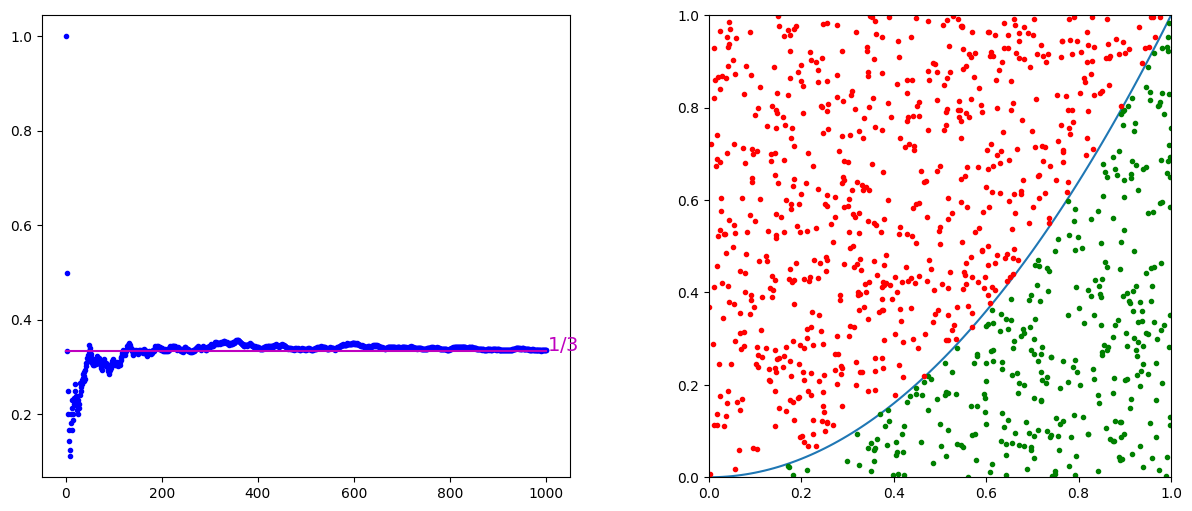

In [4]:
AireSousParabolleGraphique(1000)

**Version animée**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation
from random import *
from IPython.display import HTML

#cte
N = 100

#paramètres figure
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 6))
ax1.set_xlim(( 0, 1))
ax1.set_ylim((0, 1))
ax2.set_xlim(( 0, N))
ax2.set_ylim((0,1))
ax1.set_aspect('equal')

Xin,Yin,Xout,Yout = [],[],[],[]
somme = 0
pis = []
pointsIn, = ax1.plot([],[],'go')
pointsOut, = ax1.plot([],[],'ro')
courbe, = ax2.plot([],[])

def init():
    pointsIn.set_data([], [])
    pointsOut.set_data([], [])
    courbe.set_data([], [])
    abscisses = [k/100 for k in range(101)]
    ax1.plot(abscisses,[t**2 for t in abscisses])
    ax2.plot([0,N],[0.333,0.333],'m-')
    ax2.text(N+0.5,1/3,'$1/3$',color="m",fontsize=14)
    ax2.set_title('Fréquence de points sous la parabole')
    return (pointsIn,)

def animate(i):
    global somme
    x,y = random(),random()
    if y<x**2:
        somme +=1
        Xin.append(x)
        Yin.append(y)
        pointsIn.set_data([Xin,Yin])
    else:
        Xout.append(x)
        Yout.append(y)
        pointsOut.set_data([Xout,Yout])
    pis.append(somme/(i+1))
    courbe.set_data(range(i+1),pis)
    return (pointsIn,)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=N, init_func=init, blit=True)
# l'un ou l'autre
HTML(ani.to_jshtml()) 
#HTML(ani.to_html5_video())

[Retour au sommaire](#sommaire)

### 3.1.2 Estimation du nombre $\pi$ <a id="exemple14"></a>

On reprend l'idée de la méthode précédente, mais on compte le nombre de points situés sous le quart de cercle de rayon 1. Cela nous donne une estimation de son aire, donc du nombre $\frac{\pi}{4}$. 

In [ ]:
from random import random

def MonteCarlo(n):
    Nb = 0
    for k in range(n):
        x, y = random(), random()
        if x**2+y**2 <= 1:
            Nb += 1
    return 4 * Nb / n

In [ ]:
MonteCarlo(1000)

**Là encore, il est intéressant de proposer une visualisation graphique de la méthode.**

In [ ]:
import matplotlib.pyplot as plt 
from math import *

def MonteCarloGraphique(n):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 6))
    Nb = 0
    X1=range(1,n+1)
    Y1=[]
    X2_in=[]
    Y2_in=[]
    X2_out=[]
    Y2_out=[]
    for k in range(1,n+1):
        x, y = random(), random()
        if x**2+y**2 < 1:
            Nb += 1
            X2_in.append(x)
            Y2_in.append(y)
        else:
            X2_out.append(x)
            Y2_out.append(y)
        Y1.append(Nb / k)
    ax1.plot(X1,Y1,"b.")
    ax1.plot([0,n],[pi,pi],color='m')
    ax1.text(n+2,pi,"$\pi$",color='m',fontsize=14)
    ax2.set_xlim((0, 1))
    ax2.set_ylim((0, 1))
    ax2.set_aspect('equal')
    abscisses = [k/100 for k in range(101)]
    ax2.plot(abscisses, [sqrt(1-t**2) for t in abscisses])
    cercle = plt.Circle((0,0), 1, color = "gray", alpha = 0.1)
    ax2.add_artist(cercle)
    ax2.plot(X2_in, Y2_in, "g.")
    ax2.plot(X2_out, Y2_out,"r.")
    plt.show()
    return None

In [ ]:
MonteCarloGraphique(1000)

**Et on peut encore en proposer une version animée.** *Nb : il faut environ 30 secondes pour générer cette animation.*

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation
from random import *
from IPython.display import HTML

#cte
N = 100

#paramètres figure
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 6))
ax1.set_xlim((0, 1))
ax1.set_ylim((0, 1))
ax1.set_aspect('equal')
ax2.set_xlim((0, N))
ax2.set_ylim((1.9, 4.1))
ax2.set_aspect(N // 4)

Xin,Yin,Xout,Yout = [],[],[],[]
somme = 0
pis = []
pointsIn, = ax1.plot([],[],'go')
pointsOut, = ax1.plot([],[],'ro')
courbe, = ax2.plot([],[])
estimation = ax2.text(N//2 - N//4, 1.2, "Estimation", color = "m", fontsize = 14)

def init():
    #pointsIn.set_data([], [])
    #pointsOut.set_data([], [])
    #courbe.set_data([], [])
    cercle = plt.Circle((0,0), 1, color = "gray", alpha = 0.1)
    ax1.add_artist(cercle)
    ax2.plot([0,N],[3.14, 3.14], 'm-')
    ax2.text(N+0.5,3.1, '$\pi$', color="m", fontsize=14)
    ax2.set_title('Proportion de points dans le quart de cercle')
    return (pointsIn,)

def animate(i):
    global somme
    x,y = random(),random()
    if x**2 + y**2 < 1:
        somme +=1
        Xin.append(x)
        Yin.append(y)
        pointsIn.set_data([Xin,Yin])
    else:
        Xout.append(x)
        Yout.append(y)
        pointsOut.set_data([Xout,Yout])
    pis.append(4*somme/(i+1))
    estimation.set_text("$\pi \simeq ${} avec {} points".format(int(1000*pis[i])/1000, i+1))
    courbe.set_data(range(i+1),pis)
    return (pointsIn,)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=N, init_func=init, blit=True)
# l'un ou l'autre
HTML(ani.to_jshtml()) 
#HTML(ani.to_html5_video())

[Retour au sommaire](#sommaire)

## 3.2 Algorithme renvoyant l'espérance, la variance et l'écart-type d'une variable aléatoire <a id="exemple15"></a>

À partir d'une liste $X$ des valeurs prises par une variable aléatoire et de la liste $P$ des probabilités correspondantes.  

In [ ]:
from math import sqrt

def E(X, P):
    esperance = 0
    for (x, p) in zip(X, P):
        esperance += x*p
    return esperance

# La version suivante est peut-être plus simple à comprendre pour les élèves
def E2(X, P):
    esperance = 0
    for i in range(len(X)):
        esperance += X[i]*P[i]
    return esperance

def V(X, P):
    v = 0
    for (x, p) in zip(X, P):
        v += p*x**2
    return v - E(X, P)**2

def V2(X, P):
    v = 0
    e = E(X, P)
    for (x, p) in zip(X, P):
        v += p*(x - e)**2
    return v

def sigma(X, P):
    return sqrt(V(X, P))

In [ ]:
X = [0, 20, 40, 100]
P = [7/15, 4/15, 3/15, 1/15]
E(X, P), E2(X, P), V(X, P), V2(X, P), sigma(X, P)

[Retour au sommaire](#sommaire)

## 3.3 Fréquence d'apparition des lettres d'un texte donné, en français et en anglais. <a id="exemple16"></a>

On propose deux fonctions : la première renvoie la fréquence d’apparition d’une lettre donnée dans un texte donné; la seconde renvoie la fréquence d’apparation de chaque lettre de l’alphabet en utilisant la fonction précédente, et trace un diagramme en barres des fréquences obtenues. 

**Remarque** : Les caractères manjuscules, minuscules, accentués, . . . et les symboles de ponctuation sont considérés comme des caractères différents. Il est donc prudent, dans un premier temps, de proposer des textes concaténés en minuscules sans caractères spéciaux.

In [ ]:
import matplotlib.pyplot as plt

def AnalyseFrequentielleLettre(texte, lettre):
    nb = 0
    for caractere in texte:
        if caractere == lettre:
            nb += 1
    return nb/len(texte)

def AnalyseFrequentielleTexte(texte):
    alphabet = "abcdefghijklmnopqrstuvwxyz"
    frequences = {}
    for lettre in alphabet:
        frequences[lettre] = AnalyseFrequentielleLettre(texte, lettre)
    X = [lettre for lettre in alphabet]
    Y = [frequences[lettre] for lettre in alphabet]
    plt.bar(X,Y)
    plt.show()
    return frequences

**Avec un texte en français ("Germinal")**

In [ ]:
texte = ""
with open("germinal.txt", "r", encoding="utf8") as source:
    for ligne in source:
        texte += ligne

AnalyseFrequentielleTexte(texte)

**Avec un texte en anglais ("Le chien des Baskerville")**

In [ ]:
texte = ""
with open("chien_des_baskerville.txt", "r", encoding="utf8") as source:
    for ligne in source:
        texte += ligne
AnalyseFrequentielleTexte(texte)

**Avec des textes déposés en ligne (GitHub)**

In [ ]:
#Germinal
import requests

url = "https://raw.githubusercontent.com/NicolasVigot/AFE_Vientiane/main/germinal.txt"
source = requests.get(url)
AnalyseFrequentielleTexte(source.text)

In [ ]:
#Le chien des Baskerville
import requests

url = "https://raw.githubusercontent.com/NicolasVigot/AFE_Vientiane/main/chien_des_baskerville.txt"
source = requests.get(url)
AnalyseFrequentielleTexte(source.text)

[Retour au sommaire](#sommaire)